# Medical Domain Identifier using Natural Language Processing

## 1. Data Collection

In [63]:
import kagglehub
import os
import pandas as pd

In [64]:
dataset_path = kagglehub.dataset_download("tboyle10/medicaltranscriptions")
df = pd.read_csv(os.path.join(dataset_path, "mtsamples.csv"))

In [65]:
print(df.columns)
print(df.head())

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')
   Unnamed: 0                                        description  \
0           0   A 23-year-old white female presents with comp...   
1           1           Consult for laparoscopic gastric bypass.   
2           2           Consult for laparoscopic gastric bypass.   
3           3                             2-D M-Mode. Doppler.     
4           4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2   

## 2. Data Exploration & Preprocessing

In [66]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [67]:
def get_sentence_word_count(text_list):
    sent_count = 0
    word_count = 0
    vocab = {}
    for text in text_list:
        sentences = sent_tokenize(str(text).lower())
        sent_count = sent_count + len(sentences)
        for sentence in sentences:
            words = word_tokenize(sentence)
            for word in words:
                if (word in vocab.keys()):
                    vocab[word] = vocab[word] + 1
                else:
                    vocab[word] = 1
    word_count = len(vocab.keys())
    return sent_count, word_count

In [68]:
df = df[df['transcription'].notna()]
sent_count, word_count = get_sentence_word_count(df['transcription'].tolist())

In [69]:
print("Number of sentences in transcriptions column: " + str(sent_count))
print("Number of unique words in transcriptions column: " + str(word_count))

Number of sentences in transcriptions column: 140235
Number of unique words in transcriptions column: 35805


In [70]:
from tabulate import tabulate

In [71]:
df_cat  = df.groupby('medical_specialty')

In [72]:
headers = ["#", "Category", "Frequency"]
data = [[a + 1, b, len(c)] for a, (b, c) in enumerate(df_cat)]

print('Original Categories')
print(tabulate(data, headers=headers, tablefmt="grid"))

Original Categories
+-----+-------------------------------+-------------+
|   # | Category                      |   Frequency |
+=====+===============================+=============+
|   1 | Allergy / Immunology          |           7 |
+-----+-------------------------------+-------------+
|   2 | Autopsy                       |           8 |
+-----+-------------------------------+-------------+
|   3 | Bariatrics                    |          18 |
+-----+-------------------------------+-------------+
|   4 | Cardiovascular / Pulmonary    |         371 |
+-----+-------------------------------+-------------+
|   5 | Chiropractic                  |          14 |
+-----+-------------------------------+-------------+
|   6 | Consult - History and Phy.    |         516 |
+-----+-------------------------------+-------------+
|   7 | Cosmetic / Plastic Surgery    |          27 |
+-----+-------------------------------+-------------+
|   8 | Dentistry                     |          27 |
+-----+-

In [73]:
df_cat_fil = df_cat.filter(lambda x: x.shape[0] > 50)
df_cat_fin = df_cat_fil.groupby('medical_specialty')

In [74]:
data = [[a + 1, b, len(c)] for a, (b, c) in enumerate(df_cat_fin)]

print('Reduced Categories')
print(tabulate(data, headers=headers, tablefmt="grid"))

Reduced Categories
+-----+-------------------------------+-------------+
|   # | Category                      |   Frequency |
+=====+===============================+=============+
|   1 | Cardiovascular / Pulmonary    |         371 |
+-----+-------------------------------+-------------+
|   2 | Consult - History and Phy.    |         516 |
+-----+-------------------------------+-------------+
|   3 | Discharge Summary             |         108 |
+-----+-------------------------------+-------------+
|   4 | ENT - Otolaryngology          |          96 |
+-----+-------------------------------+-------------+
|   5 | Emergency Room Reports        |          75 |
+-----+-------------------------------+-------------+
|   6 | Gastroenterology              |         224 |
+-----+-------------------------------+-------------+
|   7 | General Medicine              |         259 |
+-----+-------------------------------+-------------+
|   8 | Hematology - Oncology         |          90 |
+-----+--

In [75]:
import random

In [76]:
headers = ["#", "Category", "Sample Transcription"]
data = [
    [
        a + 1,
        b,
        random.choice(c["transcription"].tolist())
    ]
    for a, (b, c) in enumerate(df_cat_fin)
]

print("Category Transcription Examples")
print(tabulate(data, headers=headers, tablefmt="grid"))

Category Transcription Examples
+-----+-------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

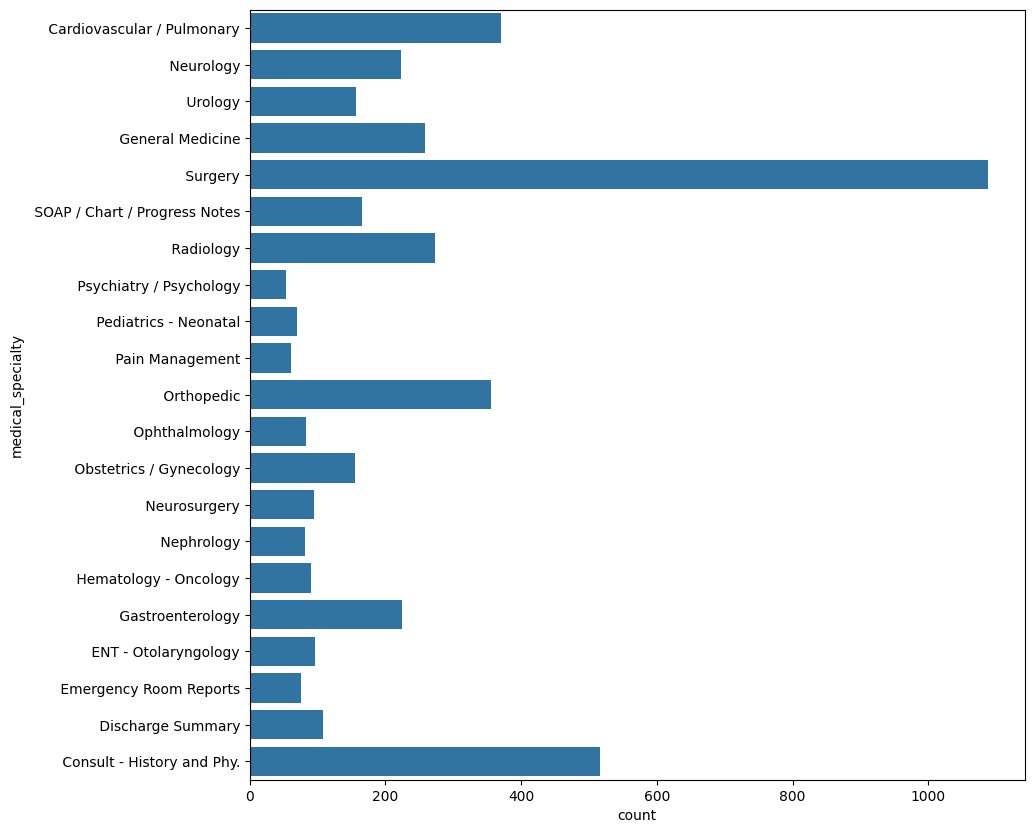

In [78]:
plt.figure(figsize=(10,10))
sns.countplot(y='medical_specialty', data=df_cat_fil)
plt.show()

In [79]:
df_fil = df_cat_fil[['transcription', 'medical_specialty']]
df_fil = df_fil.drop(df_fil[df_fil['transcription'].isna()].index)
df_fil.shape

(4597, 2)

In [80]:
import string
import re
from nltk.stem import WordNetLemmatizer

In [81]:
print("Before cleaning text:\n")
print(f'Sample Transcription 1:\n{df_fil.iloc[5]["transcription"]}\n')
print(f'Sample Transcription 2:\n{df_fil.iloc[125]["transcription"]}\n')
print(f'Sample Transcription 3:\n{df_fil.iloc[1000]['transcription']}')

Before cleaning text:

Sample Transcription 1:
CC:, Confusion and slurred speech.,HX , (primarily obtained from boyfriend): This 31 y/o RHF experienced a "flu-like illness 6-8 weeks prior to presentation. 3-4 weeks prior to presentation, she was found "passed out" in bed, and when awoken appeared confused, and lethargic. She apparently recovered within 24 hours. For two weeks prior to presentation she demonstrated emotional lability, uncharacteristic of her ( outbursts of anger and inappropriate laughter). She left a stove on.,She began slurring her speech 2 days prior to admission. On the day of presentation she developed right facial weakness and began stumbling to the right. She denied any associated headache, nausea, vomiting, fever, chills, neck stiffness or visual change. There was no history of illicit drug/ETOH use or head trauma.,PMH:, Migraine Headache.,FHX: , Unremarkable.,SHX: ,Divorced. Lives with boyfriend. 3 children alive and well. Denied tobacco/illicit drug use. Rarel

In [82]:
def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()])
    REPLACE_BY_SPACE_RE = re.compile(r'[/(){}\[\]\|@,;]')

    text2 = text1.lower()
    text2 = REPLACE_BY_SPACE_RE.sub('', text2)
    return text2


def lemmatize_text(text):
    wordlist = []
    lemmatizer = WordNetLemmatizer()
    sentences = sent_tokenize(text)

    intial_sentences = sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]

    for sentence in intial_sentences:
        words = word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    for sentence in final_sentences:
        words = word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist)

In [83]:
df_fil['transcription'] = df_fil['transcription'].apply(lemmatize_text)
df_fil['transcription'] = df_fil['transcription'].apply(clean_text)

In [84]:
print("After cleaning text:\n")
print(f'Sample Transcription 1:\n{df_fil.iloc[5]["transcription"]}\n')
print(f'Sample Transcription 2:\n{df_fil.iloc[125]["transcription"]}\n')
print(f'Sample Transcription 3:\n{df_fil.iloc[1000]['transcription']}')

After cleaning text:

Sample Transcription 1:
cc   confusion and slurred speech  hx   primarily obtained from boyfriend   this  yo rhf experienced a  flulike illness  week prior to presentation  obgyn exam including cervical biopsy  and abdominalpelvic ct scanning revealed stage iv squamous cell cancer of the cervix 

Sample Transcription 2:
admitting diagnoses    this is scheduled for the week after discharge potentially by dr g  and the patient will discus the exact time later this week 

Sample Transcription 3:
preoperative diagnoses   phimosis and adhesions  postoperative diagnoses   phimosis and adhesions  procedures performed   circumcision and release of ventral chordee  anesthesia   local mac  estimated blood loss   minimal  fluids   crystalloid  plan wa for removal of the dressing tomorrow 


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
vectorizer = TfidfVectorizer(
    analyzer='word', 
    stop_words='english',
    ngram_range=(1,3),
    max_df=0.75, 
    use_idf=True, 
    smooth_idf=True, 
    max_features=1000
)
tf_idf_mat  = vectorizer.fit_transform(df_fil['transcription'].tolist() )
feature_names = sorted(vectorizer.get_feature_names_out())
print(feature_names)

['abc', 'abcd', 'abdomen', 'abdomen pelvis', 'abdominal', 'abdominal pain', 'abnormal', 'abscess', 'activity', 'acute', 'additional', 'adenocarcinoma', 'adequate', 'administered', 'admission', 'admitted', 'admitting', 'africanamerican', 'age', 'ago', 'airway', 'alcohol', 'anemia', 'anesthesia', 'anesthesia care', 'anesthesia general', 'anesthesia general endotracheal', 'anesthesia local', 'anesthetic', 'angina', 'angiography', 'ankle', 'anterior', 'antibiotic', 'aortic', 'apnea', 'apparent', 'appear', 'appendicitis', 'applied', 'appointment', 'appropriate', 'approximately', 'area', 'arm', 'artery', 'artery disease', 'arthritis', 'arthroplasty', 'asked', 'aspect', 'aspiration', 'assessment', 'associated', 'atrial', 'atrial fibrillation', 'awakened', 'axial', 'axial ct', 'axial ct image', 'axis', 'baby', 'base', 'benefit', 'benign', 'better', 'bid', 'bilateral', 'bilaterally', 'biopsy', 'bladder', 'bleeding', 'block', 'blood', 'blood loss', 'blood loss cc', 'blood loss minimal', 'blood l

In [87]:
import numpy as np
from sklearn.manifold import TSNE

In [ ]:
tf_idf_matrix = np.asarray(tf_idf_mat.todense())
labels = df_fil['medical_specialty'].tolist()

tsne_results = TSNE(
    n_components=2, 
    init='random', 
    random_state=0, 
    perplexity=40
).fit_transform(tf_idf_matrix)
plt.figure(figsize=(20, 10))

palette = sns.hls_palette(12, l=.3, s=.9)
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=labels,
    palette=palette,
    legend="full",
    alpha=0.3
)
plt.show()

## 3. Data Splitting

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
pca = PCA(n_components=0.95)
tf_idf_mat_reduced = pca.fit_transform(tf_idf_mat.toarray())
labels = df_fil['medical_specialty'].tolist()
category_list = df_fil['medical_specialty'].unique()
X_train, X_test, y_train, y_test = train_test_split(
    tf_idf_mat_reduced, 
    labels, 
    stratify=labels,
    random_state=1
)

In [ ]:
print(f'Train Set Size: {X_train.shape}')
print(f'Test Set Size:  {X_test.shape}')

## 4. Model Training

In [ ]:
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
class GCForest(object):
    def __init__(
            self,
            shape_1X=None,
            n_mgsRFtree=30,
            window=None,
            stride=1,
            cascade_test_size=0.2,
            n_cascadeRF=2,
            n_cascadeRFtree=101,
            cascade_layer=np.inf,
            min_samples_mgs=0.1,
            min_samples_cascade=0.05,
            tolerance=0.0,
            n_jobs=1
    ):
        setattr(self, 'shape_1X', shape_1X)
        setattr(self, 'n_layer', 0)
        setattr(self, '_n_samples', 0)
        setattr(self, 'n_cascadeRF', int(n_cascadeRF))

        if isinstance(window, int):
            setattr(self, 'window', [window])
        elif isinstance(window, list):
            setattr(self, 'window', window)

        setattr(self, 'stride', stride)
        setattr(self, 'cascade_test_size', cascade_test_size)
        setattr(self, 'n_mgsRFtree', int(n_mgsRFtree))
        setattr(self, 'n_cascadeRFtree', int(n_cascadeRFtree))
        setattr(self, 'cascade_layer', cascade_layer)
        setattr(self, 'min_samples_mgs', min_samples_mgs)
        setattr(self, 'min_samples_cascade', min_samples_cascade)
        setattr(self, 'tolerance', tolerance)
        setattr(self, 'n_jobs', n_jobs)

    def fit(self, X, y):
        if np.shape(X)[0] != len(y):
            raise ValueError('Sizes of y and X do not match.')

        mgs_X = self.mg_scanning(X, y)
        _ = self.cascade_forest(mgs_X, y)

    def predict_proba(self, X):
        mgs_X = self.mg_scanning(X)
        cascade_all_pred_prob = self.cascade_forest(mgs_X)
        predict_proba = np.mean(cascade_all_pred_prob, axis=0)

        return predict_proba

    def predict(self, X):
        pred_proba = self.predict_proba(X=X)
        predictions = np.argmax(pred_proba, axis=1)

        return predictions

    def mg_scanning(self, X, y=None):
        setattr(self, '_n_samples', np.shape(X)[0])
        shape_1X = getattr(self, 'shape_1X')

        if isinstance(shape_1X, int):
            shape_1X = [1, shape_1X]

        if not getattr(self, 'window'):
            setattr(self, 'window', [shape_1X[1]])

        mgs_pred_prob = []
        for wdw_size in getattr(self, 'window'):
            wdw_pred_prob = self.window_slicing_pred_prob(
                X,
                wdw_size,
                shape_1X,
                y=y
            )
            mgs_pred_prob.append(wdw_pred_prob)

        return np.concatenate(mgs_pred_prob, axis=1)

    def window_slicing_pred_prob(self, X, window, shape_1X, y=None):
        n_tree = getattr(self, 'n_mgsRFtree')
        min_samples = getattr(self, 'min_samples_mgs')
        stride = getattr(self, 'stride')

        if shape_1X[0] > 1:
            print('Slicing Images...')
            sliced_X, sliced_y = self._window_slicing_img(
                X, window, shape_1X, y=y, stride=stride)
        else:
            print('Slicing Sequence...')
            sliced_X, sliced_y = self._window_slicing_sequence(
                X, window, shape_1X, y=y, stride=stride)

        if y is not None:
            n_jobs = getattr(self, 'n_jobs')
            prf = RandomForestClassifier(
                n_estimators=n_tree,
                max_features='sqrt',
                min_samples_split=min_samples,
                oob_score=True,
                n_jobs=n_jobs
            )
            crf = RandomForestClassifier(
                n_estimators=n_tree,
                max_features=1,
                min_samples_split=min_samples,
                oob_score=True,
                n_jobs=n_jobs
            )
            print('Training MGS Random Forests...')
            prf.fit(sliced_X, sliced_y)
            crf.fit(sliced_X, sliced_y)
            setattr(self, '_mgsprf_{}'.format(window), prf)
            setattr(self, '_mgscrf_{}'.format(window), crf)
            pred_prob_prf = prf.oob_decision_function_
            pred_prob_crf = crf.oob_decision_function_

        if hasattr(self, '_mgsprf_{}'.format(window)) and y is None:
            prf = getattr(self, '_mgsprf_{}'.format(window))
            crf = getattr(self, '_mgscrf_{}'.format(window))
            pred_prob_prf = prf.predict_proba(sliced_X)
            pred_prob_crf = crf.predict_proba(sliced_X)

        pred_prob = np.c_[pred_prob_prf, pred_prob_crf]

        return pred_prob.reshape([getattr(self, '_n_samples'), -1])

    def _window_slicing_img(self, X, window, shape_1X, y=None, stride=1):
        if any(s < window for s in shape_1X):
            raise ValueError(
                'window must be smaller than both dimensions for an image')

        len_iter_x = np.floor_divide((shape_1X[1] - window), stride) + 1
        len_iter_y = np.floor_divide((shape_1X[0] - window), stride) + 1
        iterx_array = np.arange(0, stride*len_iter_x, stride)
        itery_array = np.arange(0, stride*len_iter_y, stride)

        ref_row = np.arange(0, window)
        ref_ind = np.ravel([ref_row + shape_1X[1] * i for i in range(window)])
        inds_to_take = [ref_ind + ix + shape_1X[1] * iy
                        for ix, iy in itertools.product(iterx_array, itery_array)]

        sliced_imgs = np.take(X, inds_to_take, axis=1).reshape(-1, window**2)

        if y is not None:
            sliced_target = np.repeat(y, len_iter_x * len_iter_y)
        elif y is None:
            sliced_target = None

        return sliced_imgs, sliced_target

    def _window_slicing_sequence(self, X, window, shape_1X, y=None, stride=1):
        if shape_1X[1] < window:
            raise ValueError(
                'window must be smaller than the sequence dimension')

        len_iter = np.floor_divide((shape_1X[1] - window), stride) + 1
        iter_array = np.arange(0, stride*len_iter, stride)

        ind_1X = np.arange(np.prod(shape_1X))
        inds_to_take = [ind_1X[i:i+window] for i in iter_array]
        sliced_sqce = np.take(X, inds_to_take, axis=1).reshape(-1, window)

        if y is not None:
            sliced_target = np.repeat(y, len_iter)
        elif y is None:
            sliced_target = None

        return sliced_sqce, sliced_target

    def cascade_forest(self, X, y=None):
        if y is not None:
            setattr(self, 'n_layer', 0)
            test_size = getattr(self, 'cascade_test_size')
            max_layers = getattr(self, 'cascade_layer')
            tol = getattr(self, 'tolerance')

            X_train, X_test, y_train, y_test = train_test_split(
                X,
                y,
                test_size=test_size
            )

            self.n_layer += 1
            prf_crf_pred_ref = self._cascade_layer(X_train, y_train)
            accuracy_ref = self._cascade_evaluation(X_test, y_test)
            feat_arr = self._create_feat_arr(X_train, prf_crf_pred_ref)

            self.n_layer += 1
            prf_crf_pred_layer = self._cascade_layer(feat_arr, y_train)
            accuracy_layer = self._cascade_evaluation(X_test, y_test)

            while accuracy_layer > (accuracy_ref + tol) and self.n_layer <= max_layers:
                accuracy_ref = accuracy_layer
                prf_crf_pred_ref = prf_crf_pred_layer
                feat_arr = self._create_feat_arr(X_train, prf_crf_pred_ref)
                self.n_layer += 1
                prf_crf_pred_layer = self._cascade_layer(feat_arr, y_train)
                accuracy_layer = self._cascade_evaluation(X_test, y_test)

            if accuracy_layer < accuracy_ref:
                n_cascadeRF = getattr(self, 'n_cascadeRF')
                for irf in range(n_cascadeRF):
                    delattr(self, '_casprf{}_{}'.format(self.n_layer, irf))
                    delattr(self, '_cascrf{}_{}'.format(self.n_layer, irf))
                self.n_layer -= 1

        elif y is None:
            at_layer = 1
            prf_crf_pred_ref = self._cascade_layer(X, layer=at_layer)
            while at_layer < getattr(self, 'n_layer'):
                at_layer += 1
                feat_arr = self._create_feat_arr(X, prf_crf_pred_ref)
                prf_crf_pred_ref = self._cascade_layer(
                    feat_arr, layer=at_layer)

        return prf_crf_pred_ref

    def _cascade_layer(self, X, y=None, layer=0):
        n_tree = getattr(self, 'n_cascadeRFtree')
        n_cascadeRF = getattr(self, 'n_cascadeRF')
        min_samples = getattr(self, 'min_samples_cascade')

        n_jobs = getattr(self, 'n_jobs')
        prf = RandomForestClassifier(
            n_estimators=n_tree,
            max_features='sqrt',
            min_samples_split=min_samples,
            oob_score=True,
            n_jobs=n_jobs
        )
        crf = RandomForestClassifier(
            n_estimators=n_tree,
            max_features=1,
            min_samples_split=min_samples,
            oob_score=True,
            n_jobs=n_jobs
        )

        prf_crf_pred = []
        if y is not None:
            print('Adding/Training Layer, n_layer={}'.format(self.n_layer))
            for irf in range(n_cascadeRF):
                prf.fit(X, y)
                crf.fit(X, y)
                setattr(self, '_casprf{}_{}'.format(self.n_layer, irf), prf)
                setattr(self, '_cascrf{}_{}'.format(self.n_layer, irf), crf)
                prf_crf_pred.append(prf.oob_decision_function_)
                prf_crf_pred.append(crf.oob_decision_function_)
        elif y is None:
            for irf in range(n_cascadeRF):
                prf = getattr(self, '_casprf{}_{}'.format(layer, irf))
                crf = getattr(self, '_cascrf{}_{}'.format(layer, irf))
                prf_crf_pred.append(prf.predict_proba(X))
                prf_crf_pred.append(crf.predict_proba(X))

        return prf_crf_pred

    def _cascade_evaluation(self, X_test, y_test):
        casc_pred_prob = np.mean(self.cascade_forest(X_test), axis=0)
        casc_pred = np.argmax(casc_pred_prob, axis=1)
        casc_accuracy = accuracy_score(y_true=y_test, y_pred=casc_pred)
        print('Layer validation accuracy = {}'.format(casc_accuracy))

        return casc_accuracy

    def _create_feat_arr(self, X, prf_crf_pred):
        swap_pred = np.swapaxes(prf_crf_pred, 0, 1)
        add_feat = swap_pred.reshape([np.shape(X)[0], -1])
        feat_arr = np.concatenate([add_feat, X], axis=1)

        return feat_arr

In [ ]:
gcf = GCForest(n_cascadeRF=2,n_cascadeRFtree=500)
temp = gcf.cascade_forest(X_train, y_train)

In [ ]:
labels

## 5. Model Evaluation

In [ ]:
y_test_pred = gcf.cascade_forest(X_test)
labels = category_list

In [ ]:
temp_array = []
for i in range(len(y_test_pred[0])):
    cur_tuple_pred = []
    for j in range(len(y_test_pred[0][0])):
        cur_tuple_pred.append(
            (
                y_test_pred[0][i][j] +
                y_test_pred[1][i][j] +
                y_test_pred[2][i][j] +
                y_test_pred[3][i][j]
            ) / 4
        )
    temp_array.append(cur_tuple_pred)

In [ ]:
temp_array = y_test_pred[3]
label_pred = []
for i in range(len(temp_array)):
    label_pred.append(
        labels[temp_array[i].tolist().index(max(temp_array[i]))]
    )

In [ ]:
label_pred

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(confusion_matrix(y_test, label_pred), annot=True, cmap="Greens", ax=ax, fmt='g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()